In [2]:
import pickle

# Andiamo a caricare le serie temporali degli indici vigitali

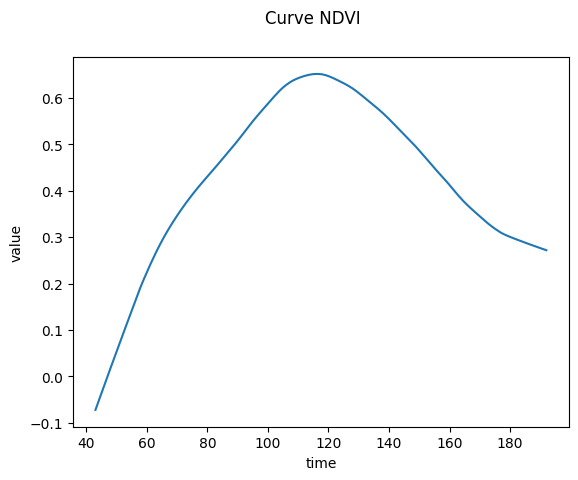

In [7]:
with open('./pickles/ndvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
NDVI.mean().plot()
print() #fix duplicate plot